In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nibabel as nib
import cv2
from mlxtend.preprocessing import one_hot
import timeit
from random import shuffle
from MPC_tools import *
from layers import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


%matplotlib inline

# Loading Data

In [2]:
base_dir = '/media/cocoan-gpu1/wani_8T/data/SEMIC'
project_type = 'semic'
type1 = 'model02_FIR_SPM_SINGLE_TRIAL'
type2 = 'model02_Overall_FIR_SPM_SINGLE_TRIAL'

In [3]:
dir_path_list, filenames_list = making_file_path(base_dir, project_type, type1, type2)

In [4]:
print(dir_path_list.shape)
print(dir_path_list)
print(len(filenames_list[59]))

(118,)
['/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic001'
 '/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic002'
 '/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic003'
 '/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic004'
 '/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic005'
 '/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic006'
 '/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic007'
 '/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic008'
 '/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic009'
 '/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic010'
 '/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic011'
 '/media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic01

In [5]:
full_path_list = making_full_path_list(dir_path_list, filenames_list)

In [6]:
print(len(full_path_list[0]))

6051


In [7]:
total_index = np.arange(0,118)
print(total_index)

load_index = np.delete(total_index, [17,55,56,57,58,75,114,115,116,117])
print(load_index)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113]


In [8]:
load_index = [1,2,3,59,60,61]

In [9]:
data_num = np.arange(0,30)
print(data_num)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [10]:
X, Y = load_nii(project_type, load_index, full_path_list, data_num, nan_to_zero=True, One_Hot=True)

Finished Loading 1th nii File In /media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic002  
#####################################################
###  Duration Time  : 0 minutes   0 seconds      ###
###  Excecuted Time : 2019-04-10 17:05:00.485612 ###
#####################################################


Finished Loading 1th nii File In /media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic003  
#####################################################
###  Duration Time  : 0 minutes   0 seconds      ###
###  Excecuted Time : 2019-04-10 17:05:00.931884 ###
#####################################################


Finished Loading 1th nii File In /media/cocoan-gpu1/wani_8T/data/SEMIC/model02_FIR_SPM_SINGLE_TRIAL/sub-semic004  
#####################################################
###  Duration Time  : 0 minutes   1 seconds      ###
###  Excecuted Time : 2019-04-10 17:05:02.105941 ###
#####################################################


Finishe

In [11]:
X = X[:,:,:,:,np.newaxis]

print(X.shape)
print(Y.shape)

(180, 79, 95, 79, 1)
(180, 2)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(144, 79, 95, 79, 1)
(36, 79, 95, 79, 1)
(144, 2)
(36, 2)


# Making tensorflow graph

In [13]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv3d(x, W, strides=[1, 1, 1, 1, 1]):
    return tf.nn.conv3d(x, W, strides, padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool3d(x, ksize=[1, 2, 2, 2, 1],
                          strides=[1, 2, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, strides, shape):
    W = init_weights(shape)
    b = init_bias([shape[4]])
    return tf.nn.relu(conv3d(input_x, W, strides) + b)


def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

def batch_norm(data, is_train, name=None):
    return tf.layers.batch_normalization(data, training=is_train, name=name)

In [14]:
x = tf.placeholder(tf.float32,shape=[None,79, 95, 79,1])
y_true = tf.placeholder(tf.float32,shape=[None,2])
is_train = tf.placeholder(tf.bool)
hold_prob = tf.placeholder(tf.float32)

In [15]:
convo_1 = convolutional_layer(x,strides = [1, 2, 2, 2, 1], shape=[4,4,4,1,16])
convo_1 = convolutional_layer(convo_1,strides = [1, 2, 2, 2, 1], shape=[4,4,4,16,32])
convo_1_bath_norm = batch_norm(convo_1, is_train, name=None)

In [16]:
convo_2 = convolutional_layer(convo_1_bath_norm, strides = [1, 1, 1, 1, 1], shape=[4,4,4,32,64])
convo_2_pooling = max_pool_2by2(convo_2)
convo_2_bath_norm = batch_norm(convo_2_pooling, is_train, name=None)

In [17]:
convo_3 = convolutional_layer(convo_2_bath_norm, strides = [1, 1, 1, 1, 1], shape=[4,4,4,64,256])
convo_3_pooling = max_pool_2by2(convo_3)
convo_3_bath_norm = batch_norm(convo_3_pooling, is_train, name=None)

In [18]:
convo_4 = convolutional_layer(convo_3_bath_norm, strides = [1, 1, 1, 1, 1], shape=[4,4,4,256,512])
convo_4_pooling = max_pool_2by2(convo_4)
convo_4_bath_norm = batch_norm(convo_4_pooling, is_train, name=None)

In [19]:
convo_4_flat = tf.reshape(convo_4_bath_norm,[-1,3*3*3*512])
full_layer_one = tf.nn.relu(normal_full_layer(convo_4_flat,512))
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [20]:
y_pred = normal_full_layer(full_one_dropout,2)

In [25]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))
#cross_entropy = tf.reduce_mean(tf.losses.softmax_cross_entropy(y_true,y_pred))
#cross_entropy = tf.reduce_mean(tf.losses.sigmoid_cross_entropy(y_true,y_pred))

#mse = tf.losses.mean_squared_error(y_true, y_pred)
learning_rate = 1e-4
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(cross_entropy)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# data count

total data = 180

train data = 144 = 0:144

test data = 36 = 0:36

In [26]:
acc_list = []
train_entrop_list = []
test_entrop_list = []
step_list = []

lowest_loss = None

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    
    for i in range(100):
        j = i%14
        t = i%3
        
        _, train_entropy = sess.run([train, cross_entropy], feed_dict={x: X_train[j*10:j*10+10], y_true: y_train[j*10:j*10+10], 
                                                                       hold_prob: 0.5, is_train:True})
        matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

        acc = tf.reduce_mean(tf.cast(matches,tf.float32))
        test_entropy,accuracy= sess.run([cross_entropy, acc],feed_dict={x:X_test[t*10:t*10+10],y_true:y_test[t*10:t*10+10],
                                                                        hold_prob:1.0, is_train:False})
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%10 == 0:
            print("* * * * * * * * * * * * *")
            print('Currently on step {}'.format(i))
            print('##Train Cross entropy is:')
            print(train_entropy)
            print('##Test Cross entropy is:')
            print(test_entropy)            
            print('##Accuracy is:')
            print(accuracy)
            print("* * * * * * * * * * * * *")
            print('\n')


        if i == 0:
            acc_list = accuracy
            train_entrop_list = train_entropy
            test_entrop_list = test_entropy
            step_list = i
        else :
            acc_list = np.append(acc_list, accuracy)
            train_entrop_list = np.append(train_entrop_list, train_entropy)
            test_entrop_list = np.append(test_entrop_list, test_entropy)
            step_list = np.append(step_list, i)

        if lowest_loss == None or lowest_loss > test_entropy:
            lowest_loss = test_entropy
            saver.save(sess, "./model/MPC_cnn_basic_SEMIC_ver1.ckpt")

* * * * * * * * * * * * *
Currently on step 0
##Train Cross entropy is:
14.472821
##Test Cross entropy is:
55.984264
##Accuracy is:
0.5
* * * * * * * * * * * * *


* * * * * * * * * * * * *
Currently on step 10
##Train Cross entropy is:
1.4905512
##Test Cross entropy is:
263.2961
##Accuracy is:
0.8
* * * * * * * * * * * * *


* * * * * * * * * * * * *
Currently on step 20
##Train Cross entropy is:
8.654599
##Test Cross entropy is:
1405.7034
##Accuracy is:
0.2
* * * * * * * * * * * * *


* * * * * * * * * * * * *
Currently on step 30
##Train Cross entropy is:
5.378171
##Test Cross entropy is:
989.11707
##Accuracy is:
0.5
* * * * * * * * * * * * *


* * * * * * * * * * * * *
Currently on step 40
##Train Cross entropy is:
0.0
##Test Cross entropy is:
416.94077
##Accuracy is:
0.8
* * * * * * * * * * * * *


* * * * * * * * * * * * *
Currently on step 50
##Train Cross entropy is:
2.3841855e-08
##Test Cross entropy is:
1731.764
##Accuracy is:
0.2
* * * * * * * * * * * * *


* * * * * * * * *

In [ ]:
'''
        if i%10000 == 0:
            learning_rate *= 0.1
            optimizer = tf.train.AdamOptimizer(learning_rate)
            print("learning rate changed {}".format(learning_rate))
            print('\n')
'''

# Visualize result

In [86]:
result_list = pd.DataFrame({"acc_list":acc_list,"train_entrop_list":train_entrop_list,"test_entrop_list":test_entrop_list,"step":step_list})
result_list.head()

,acc_list,train_entrop_list,test_entrop_list,step
0,0.5,12.427562,7615238.5,0
1,0.3,18.092529,10650734.0,1
2,0.6,15.423193,6098420.0,2
3,0.3,20.632160,10669722.0,3
4,0.6,10.217410,6079121.0,4


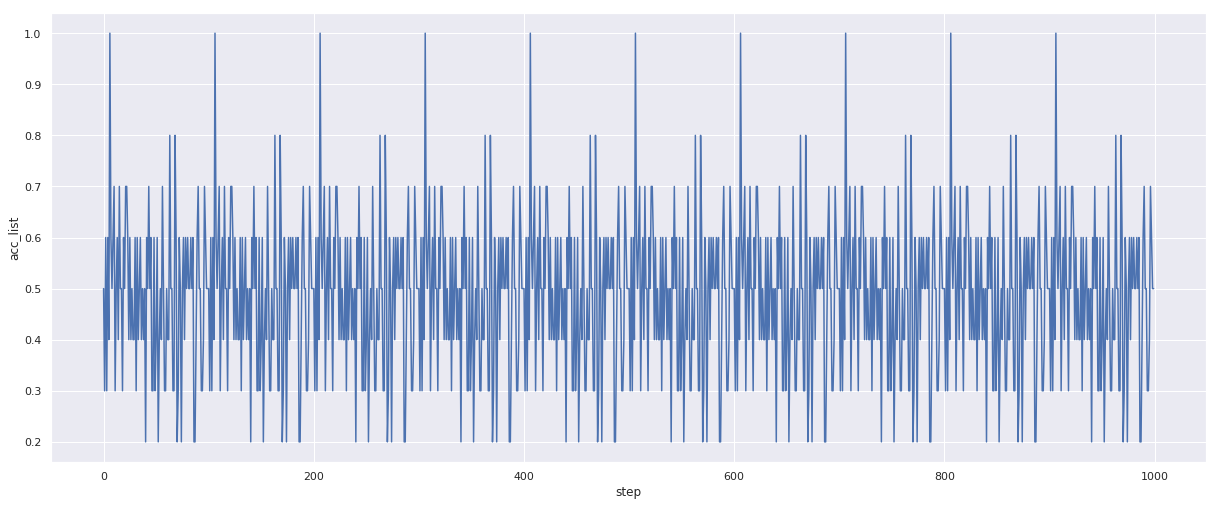

In [87]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["acc_list"])

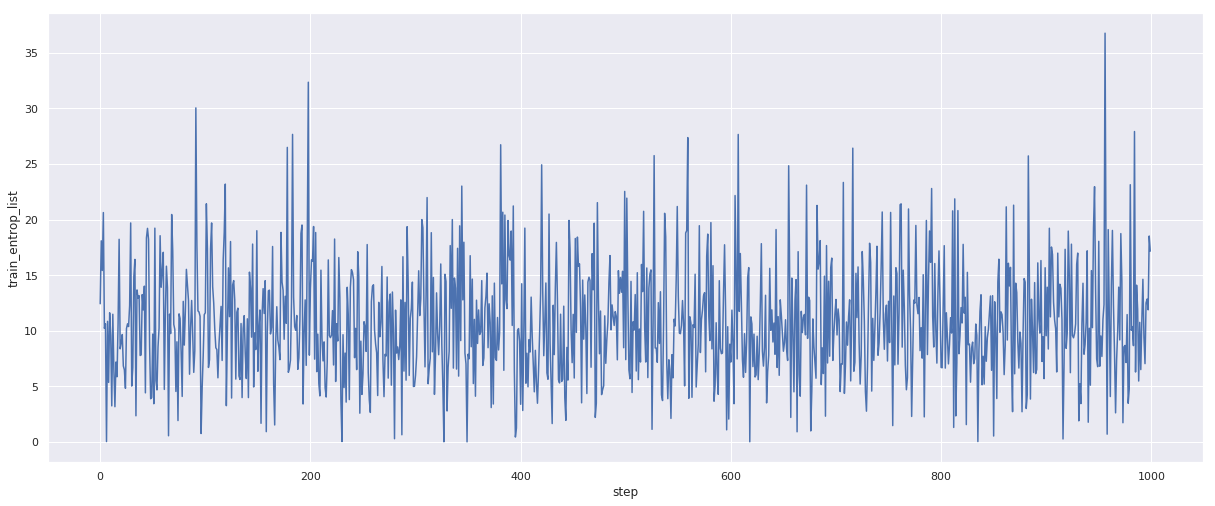

In [88]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["train_entrop_list"])

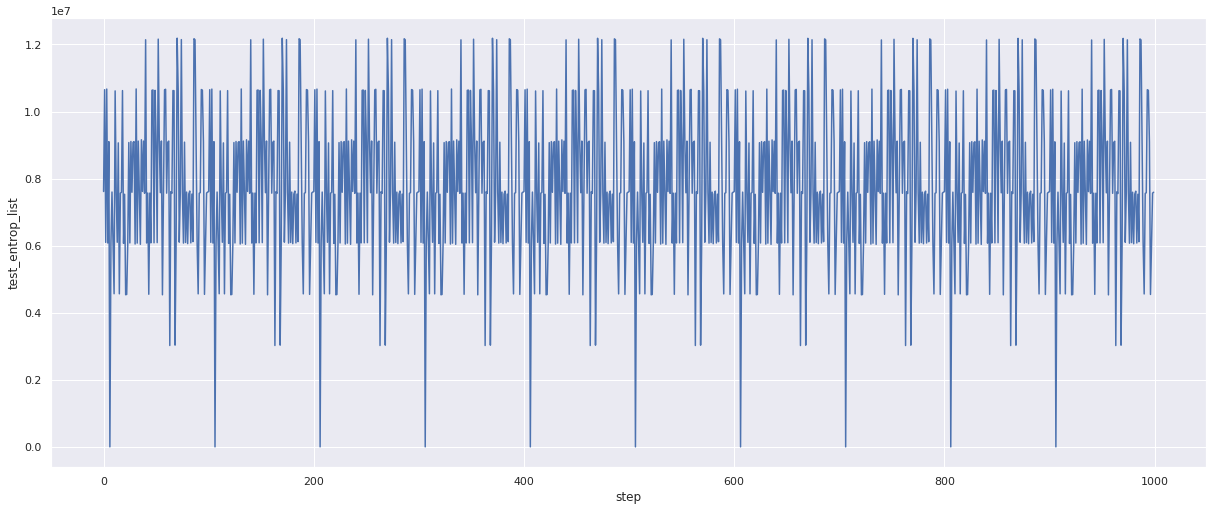

In [89]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["test_entrop_list"])

# Loading saved model

In [67]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv3d(x, W, strides=[1, 1, 1, 1, 1]):
    return tf.nn.conv3d(x, W, strides, padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool3d(x, ksize=[1, 2, 2, 2, 1],
                          strides=[1, 2, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, strides, shape):
    W = init_weights(shape)
    b = init_bias([shape[4]])
    return tf.nn.relu(conv3d(input_x, W, strides) + b)


def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

def batch_norm(data, is_train, name=None):
    return tf.layers.batch_normalization(data, training=is_train, name=name)


tf.reset_default_graph()

caps_graph = tf.Graph()

with caps_graph.as_default():
    x = tf.placeholder(tf.float32,shape=[None,91, 109, 91,1])
    y_true = tf.placeholder(tf.float32,shape=[None,2])
    is_train = tf.placeholder(tf.bool)
    hold_prob = tf.placeholder(tf.float32)

    convo_1 = convolutional_layer(x,strides = [1, 2, 2, 2, 1], shape=[4,4,4,1,16])
    convo_1 = convolutional_layer(convo_1,strides = [1, 2, 2, 2, 1], shape=[4,4,4,16,32])
    convo_1_bath_norm = batch_norm(convo_1, is_train, name=None)

    convo_2 = convolutional_layer(convo_1_bath_norm, strides = [1, 1, 1, 1, 1], shape=[4,4,4,32,64])
    convo_2_pooling = max_pool_2by2(convo_2)
    convo_2_bath_norm = batch_norm(convo_2_pooling, is_train, name=None)

    convo_3 = convolutional_layer(convo_2_bath_norm, strides = [1, 1, 1, 1, 1], shape=[4,4,4,64,256])
    convo_3_pooling = max_pool_2by2(convo_3)
    convo_3_bath_norm = batch_norm(convo_3_pooling, is_train, name=None)

    convo_4 = convolutional_layer(convo_3_bath_norm, strides = [1, 1, 1, 1, 1], shape=[4,4,4,256,512])
    convo_4_pooling = max_pool_2by2(convo_4)
    convo_4_bath_norm = batch_norm(convo_4_pooling, is_train, name=None)

    convo_4_flat = tf.reshape(convo_4_bath_norm,[-1,3*4*3*512])
    full_layer_one = tf.nn.relu(normal_full_layer(convo_4_flat,512))
    full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

    y_pred = normal_full_layer(full_one_dropout,2)

    cross_entropy = tf.reduce_mean(tf.losses.softmax_cross_entropy(y_true,y_pred))
    learning_rate = 1e-5
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train = optimizer.minimize(cross_entropy)
    init = tf.global_variables_initializer()
    
config = tf.ConfigProto(log_device_placement=False, allow_soft_placement=True)
config.gpu_options.allow_growth = True
sess = tf.Session(config=config, graph=caps_graph)

In [69]:
with caps_graph.as_default():
    saver = tf.train.Saver()
    saver.restore(sess, "./model/basic_cnn_caps_ver1.ckpt")
test_mse, pred = sess.run([mse, y_pred],feed_dict={x:train_X[4100:4110],y_true:int_train_Y[4100:4110],hold_prob:1.0,is_train:False})

INFO:tensorflow:Restoring parameters from ./model/basic_cnn_caps_ver1.ckpt


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Variable/Adam not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]
	 [[Node: save/RestoreV2/_127 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_132_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'save/RestoreV2', defined at:
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2843, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2869, in _run_cell
    return runner(coro)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3044, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3209, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-69-618a8058eeeb>", line 2, in <module>
    saver = tf.train.Saver()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1281, in __init__
    self.build()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1293, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1330, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 778, in _build_internal
    restore_sequentially, reshape)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 397, in _AddRestoreOps
    restore_sequentially)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 829, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1463, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

NotFoundError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Variable/Adam not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]
	 [[Node: save/RestoreV2/_127 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_132_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


In [23]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv3d(x, W, strides=[1, 1, 1, 1, 1]):
    return tf.nn.conv3d(x, W, strides, padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool3d(x, ksize=[1, 2, 2, 2, 1],
                          strides=[1, 2, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, strides, shape):
    W = init_weights(shape)
    b = init_bias([shape[4]])
    return tf.nn.relu(conv3d(input_x, W, strides) + b)


def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

def batch_norm(data, is_train, name=None):
    return tf.layers.batch_normalization(data, training=is_train, name=name)

tf.reset_default_graph()

semic_graph = tf.Graph()

with semic_graph.as_default():
    x = tf.placeholder(tf.float32,shape=[None,79,95,79,1])
    y_true = tf.placeholder(tf.float32,shape=[None,1])
    is_train = tf.placeholder(tf.bool)
    hold_prob = tf.placeholder(tf.float32)

    convo_1 = convolutional_layer(x,strides = [1, 2, 2, 2, 1], shape=[4,4,4,1,16])
    convo_1 = convolutional_layer(convo_1,strides = [1, 2, 2, 2, 1], shape=[4,4,4,16,32])
    convo_1_bath_norm = batch_norm(convo_1, is_train, name=None)
    
    convo_2 = convolutional_layer(convo_1, strides = [1, 1, 1, 1, 1], shape=[4,4,4,32,64])
    convo_2_pooling = max_pool_2by2(convo_2)
    convo_2_bath_norm = batch_norm(convo_2_pooling, is_train, name=None)
    
    convo_3 = convolutional_layer(convo_2_pooling, strides = [1, 1, 1, 1, 1], shape=[4,4,4,64,256])
    convo_3_pooling = max_pool_2by2(convo_3)
    convo_3_bath_norm = batch_norm(convo_3_pooling, is_train, name=None)
    
    convo_4 = convolutional_layer(convo_3_pooling, strides = [1, 1, 1, 1, 1], shape=[4,4,4,256,512])
    convo_4_pooling = max_pool_2by2(convo_4)
    convo_4_bath_norm = batch_norm(convo_4_pooling, is_train, name=None)
        
    convo_4_flat = tf.reshape(convo_4_pooling,[-1,3*3*3*512])
    full_layer_one = tf.nn.relu(normal_full_layer(convo_4_flat,512))
    full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)
    
    y_pred = normal_full_layer(full_one_dropout,1)

    mse = tf.losses.mean_squared_error(y_true, y_pred)
    learning_rate = 1e-5
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train = optimizer.minimize(mse)
    init = tf.global_variables_initializer()

config = tf.ConfigProto(log_device_placement=False, allow_soft_placement=True)
config.gpu_options.allow_growth = True
sess = tf.Session(config=config, graph=semic_graph)

In [24]:
with semic_graph.as_default():
    saver = tf.train.Saver()
    saver.restore(sess, "./model/basic_cnn2_ver5.ckpt")
test_mse, pred = sess.run([mse, y_pred],feed_dict={x:train_X[6000:6010],y_true:int_train_Y[6000:6010],hold_prob:1.0,is_train:False})

INFO:tensorflow:Restoring parameters from ./model/basic_cnn2_ver4.ckpt


In [26]:
pred

array([[  0.49255717],
       [-12.111319  ],
       [  0.49255717],
       [  0.49255717],
       [  0.49255717],
       [  0.49255717],
       [  5.793043  ],
       [  0.49255717],
       [ 10.683447  ],
       [  0.49255717]], dtype=float32)

In [28]:
test_mse

31.467737

In [29]:
dp = pd.DataFrame(train_Y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8d57a50f0>]],
      dtype=object)

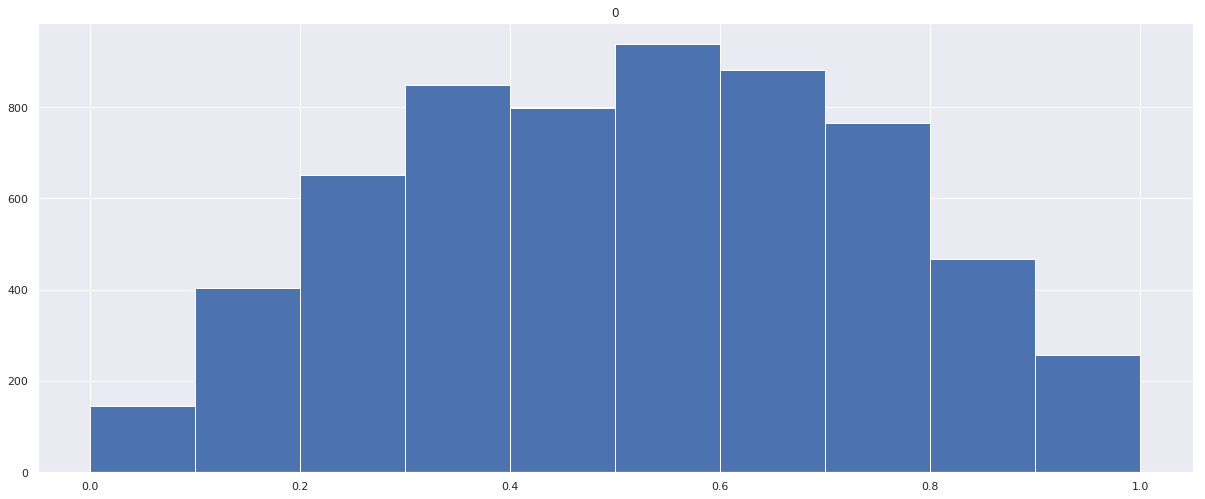

In [30]:
dp.hist()